# Курсовой проект

In [4]:
'''Установка бустинговых алгоритмов'''
!pip install xgboost
!pip install lightgbm
!pip install catboost
!pip install imblearn

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=8fa5e96cf7c05c5f79b38e1d306043f83f0af58f9166ac09af095b539e9da7d1
  Stored in directory: c:\users\test\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Отказано в доступе: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.22.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [5]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Отказано в доступе: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.22.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [788]:
'''Импорт модулей, библиотек'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import pickle
import random
import seaborn as sns
import time

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris

import xgboost as xgb, lightgbm as lgbm, catboost as catb

from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg'
pd.options.display.max_columns=100
np.random.seed(37)

In [789]:
DATASET_TRAIN = 'course_project_train.csv'
DATASET_TEST = 'course_project_test.csv'

### Этап 1. Обзор обучающего датасета

In [790]:
df_test = pd.read_csv(DATASET_TEST)

In [791]:
df_train = pd.read_csv(DATASET_TRAIN)

In [792]:
df_train.head(10) # первые 10 строк тренировочного датасета

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   
5           Rent            NaN              7 years        0.0   
6  Home Mortgage      1511108.0            10+ years        0.0   
7           Rent      1040060.0            10+ years        0.0   
8  Home Mortgage            NaN              5 years        0.0   
9  Home Mortgage            NaN               1 year        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   
5                     12.0                     14.6             366784.0   
6                      9.0                     20.3             388124.0   
7                     13.0                     12.0             330374.0   
8                     17.0                     15.7                  0.0   
9                     10.0                     24.6             511302.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   
5                        0.0                           NaN           0.0   
6                        0.0                          73.0           0.0   
7                        0.0                          18.0           0.0   
8                        1.0                           NaN           1.0   
9                        0.0                           6.0           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   
5               other   Long Term             337304.0   
6   home improvements  Short Term           99999999.0   
7               other  Short Term             250888.0   
8   home improvements  Short Term             129734.0   
9  debt consolidation   Long Term             572880.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0  
5                165680.0       18692.0           NaN               1  
6                 51623.0        2317.0         745.0               0  
7                 89015.0       19761.0         705.0               1  
8                    19.0          17.0           NaN               0  
9                205333.0       17613.0           NaN               1

In [793]:
df_test.head(10) # первые 10 строк тестового датасета

Home Ownership  Annual Income Years in current job  Tax Liens  \
0           Rent            NaN              4 years        0.0   
1           Rent       231838.0               1 year        0.0   
2  Home Mortgage      1152540.0              3 years        0.0   
3  Home Mortgage      1220313.0            10+ years        0.0   
4  Home Mortgage      2340952.0              6 years        0.0   
5  Home Mortgage       922583.0              5 years        0.0   
6  Home Mortgage      1233309.0              3 years        0.0   
7           Rent      1215867.0              3 years        0.0   
8           Rent            NaN              5 years        0.0   
9  Home Mortgage      2140445.0            10+ years        1.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                      9.0                     12.5             220968.0   
1                      6.0                     32.7              55946.0   
2                     10.0                     13.7             204600.0   
3                     16.0                     17.0             456302.0   
4                     11.0                     23.6            1207272.0   
5                     26.0                     17.5             713174.0   
6                      7.0                     22.0             376420.0   
7                     13.0                     12.2             195888.0   
8                      8.0                      9.1             370524.0   
9                     15.0                     16.7             867680.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        0.0                          70.0           0.0   
1                        0.0                           8.0           0.0   
2                        0.0                           NaN           0.0   
3                        0.0                          70.0           0.0   
4                        0.0                           NaN           0.0   
5                        0.0                          41.0           0.0   
6                        0.0                          43.0           0.0   
7                        0.0                          19.0           0.0   
8                        0.0                           NaN           0.0   
9                        1.0                           9.0           0.0   

                Purpose        Term  Current Loan Amount  \
0    debt consolidation  Short Term             162470.0   
1  educational expenses  Short Term              78298.0   
2    debt consolidation  Short Term             200178.0   
3    debt consolidation  Short Term             217382.0   
4    debt consolidation   Long Term             777634.0   
5    debt consolidation  Short Term              94028.0   
6     home improvements  Short Term             454388.0   
7    debt consolidation  Short Term             407726.0   
8        major purchase  Short Term             131956.0   
9    debt consolidation  Short Term             391336.0   

   Current Credit Balance  Monthly Debt  Credit Score  
0                105906.0        6813.0           NaN  
1                 46037.0        2318.0         699.0  
2                146490.0       18729.0        7260.0  
3                213199.0       27559.0         739.0  
4                425391.0       42605.0         706.0  
5                135508.0       11148.0         679.0  
6                292904.0        8181.0         685.0  
7                120099.0        7599.0         701.0  
8                237747.0       10112.0           NaN  
9                294500.0       18372.0         745.0

In [794]:
df_train.info() # информация о тренировочном датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [795]:
df_test.info() # информация о тестовом датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [796]:
df_train.describe() # основные показатели признаков тренировочного датасета

Annual Income    Tax Liens  Number of Open Accounts  \
count   5.943000e+03  7500.000000              7500.000000   
mean    1.366392e+06     0.030133                11.130933   
std     8.453392e+05     0.271604                 4.908924   
min     1.645970e+05     0.000000                 2.000000   
25%     8.443410e+05     0.000000                 8.000000   
50%     1.168386e+06     0.000000                10.000000   
75%     1.640137e+06     0.000000                14.000000   
max     1.014934e+07     7.000000                43.000000   

       Years of Credit History  Maximum Open Credit  \
count              7500.000000         7.500000e+03   
mean                 18.317467         9.451537e+05   
std                   7.041946         1.602622e+07   
min                   4.000000         0.000000e+00   
25%                  13.500000         2.792295e+05   
50%                  17.000000         4.781590e+05   
75%                  21.800000         7.935015e+05   
max                  57.700000         1.304726e+09   

       Number of Credit Problems  Months since last delinquent  Bankruptcies  \
count                7500.000000                   3419.000000   7486.000000   
mean                    0.170000                     34.692600      0.117152   
std                     0.498598                     21.688806      0.347192   
min                     0.000000                      0.000000      0.000000   
25%                     0.000000                     16.000000      0.000000   
50%                     0.000000                     32.000000      0.000000   
75%                     0.000000                     50.000000      0.000000   
max                     7.000000                    118.000000      4.000000   

       Current Loan Amount  Current Credit Balance   Monthly Debt  \
count         7.500000e+03            7.500000e+03    7500.000000   
mean          1.187318e+07            2.898332e+05   18314.454133   
std           3.192612e+07            3.178714e+05   11926.764673   
min           1.124200e+04            0.000000e+00       0.000000   
25%           1.801690e+05            1.142565e+05   10067.500000   
50%           3.095730e+05            2.093230e+05   16076.500000   
75%           5.198820e+05            3.604062e+05   23818.000000   
max           1.000000e+08            6.506797e+06  136679.000000   

       Credit Score  Credit Default  
count   5943.000000     7500.000000  
mean    1151.087498        0.281733  
std     1604.451418        0.449874  
min      585.000000        0.000000  
25%      711.000000        0.000000  
50%      731.000000        0.000000  
75%      743.000000        1.000000  
max     7510.000000        1.000000

In [797]:
df_test.describe() # основные показатели признаков тестового датасета

Annual Income    Tax Liens  Number of Open Accounts  \
count   1.987000e+03  2500.000000              2500.000000   
mean    1.366922e+06     0.035200                11.184400   
std     9.171252e+05     0.386291                 4.852774   
min     1.065330e+05     0.000000                 1.000000   
25%     8.523115e+05     0.000000                 8.000000   
50%     1.178475e+06     0.000000                10.000000   
75%     1.629734e+06     0.000000                14.000000   
max     1.497561e+07    15.000000                48.000000   

       Years of Credit History  Maximum Open Credit  \
count              2500.000000         2.500000e+03   
mean                 18.325920         7.105704e+05   
std                   7.254659         1.511983e+06   
min                   3.900000         0.000000e+00   
25%                  13.400000         2.785860e+05   
50%                  17.000000         4.786760e+05   
75%                  22.100000         8.025985e+05   
max                  53.400000         5.448439e+07   

       Number of Credit Problems  Months since last delinquent  Bankruptcies  \
count                2500.000000                   1142.000000   2497.000000   
mean                    0.162000                     34.181261      0.106928   
std                     0.559894                     22.024277      0.357189   
min                     0.000000                      0.000000      0.000000   
25%                     0.000000                     16.000000      0.000000   
50%                     0.000000                     30.000000      0.000000   
75%                     0.000000                     50.000000      0.000000   
max                    15.000000                     82.000000      5.000000   

       Current Loan Amount  Current Credit Balance  Monthly Debt  Credit Score  
count         2.500000e+03            2.500000e+03   2500.000000   1987.000000  
mean          1.215572e+07            2.963966e+05  18271.340000   1234.516860  
std           3.226097e+07            3.783020e+05  11543.881469   1740.219442  
min           1.542200e+04            0.000000e+00     93.000000    585.000000  
25%           1.871265e+05            1.101145e+05  10024.750000    710.000000  
50%           3.223660e+05            2.073850e+05  16642.500000    731.000000  
75%           5.225825e+05            3.663485e+05  24146.000000    743.000000  
max           1.000000e+08            6.030087e+06  93555.000000   7480.000000

In [798]:
'''Визуальное изучение распределений с помощью функции boxplot'''
def plot_outliers(df_train, df_test, col_name, hist = False):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    ax[0].set_title('Train Dataset')
    ax[1].set_title('Test Dataset')
    sns.boxplot(df_train[col_name], ax=ax[0])
    sns.boxplot(df_test[col_name], color='r', ax=ax[1])
    plt.show()

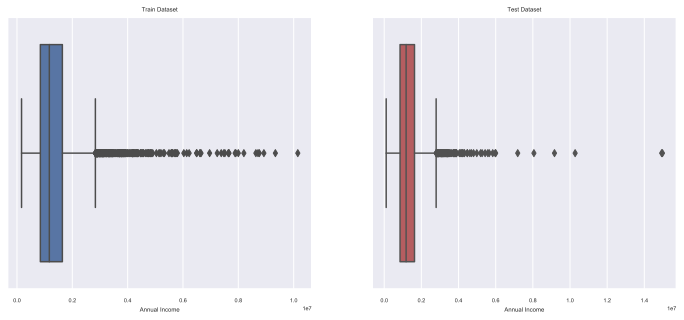

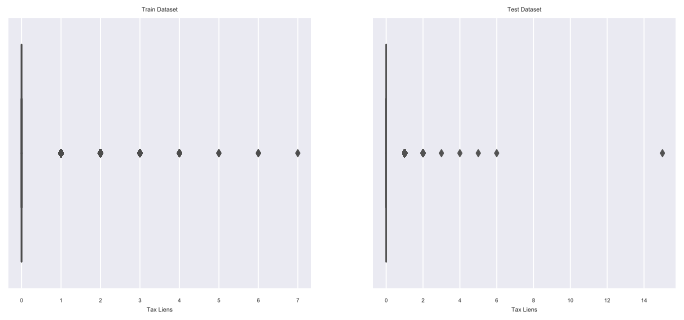

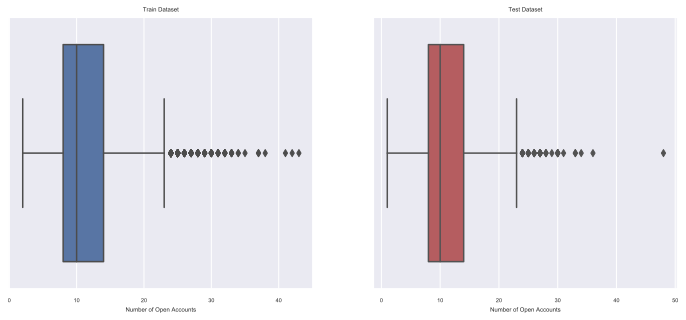

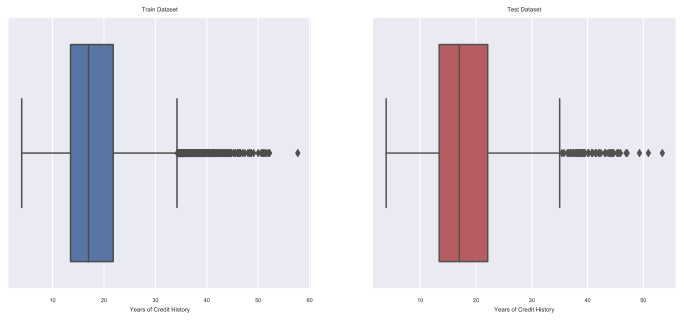

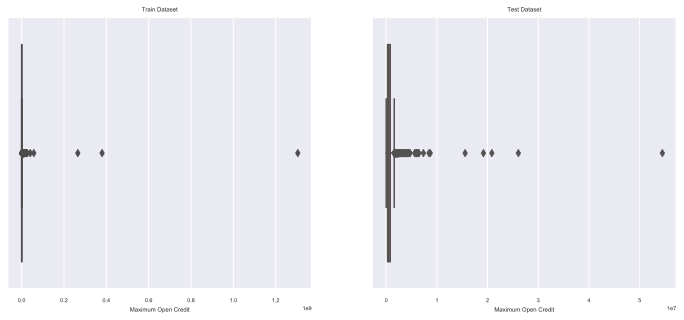

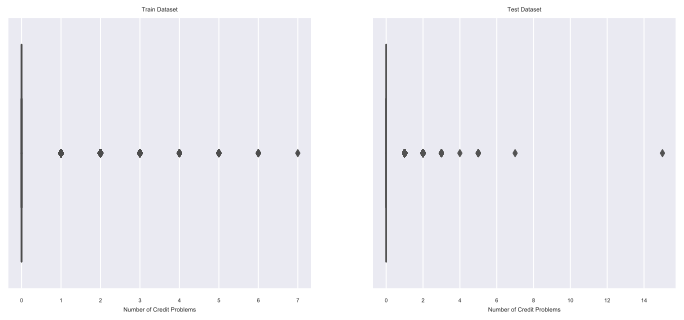

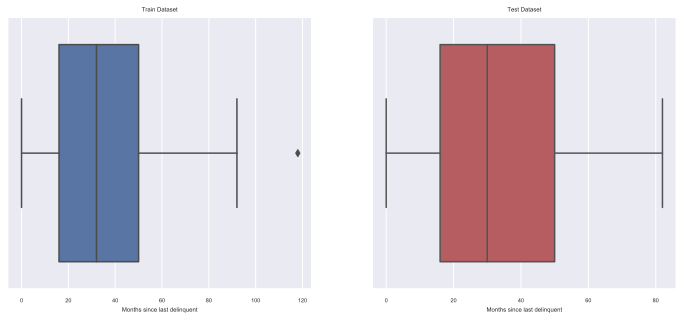

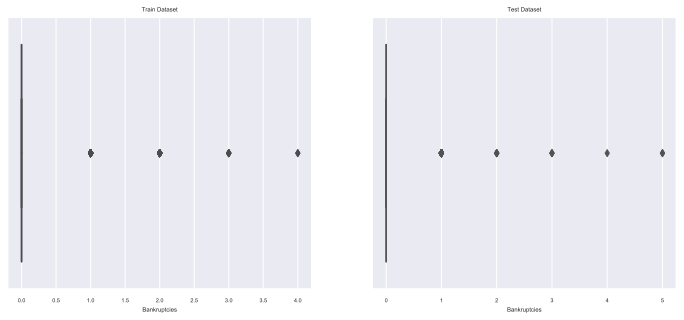

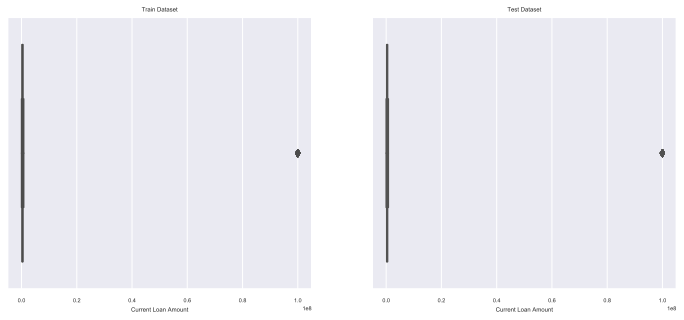

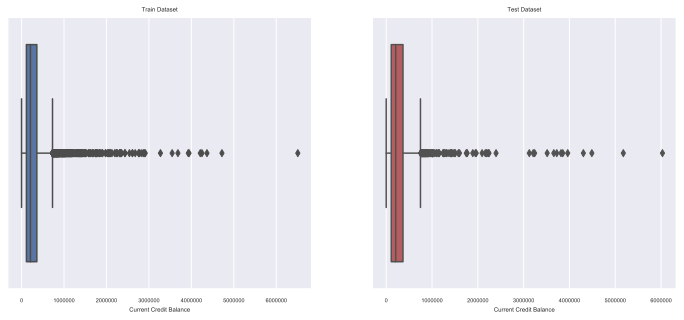

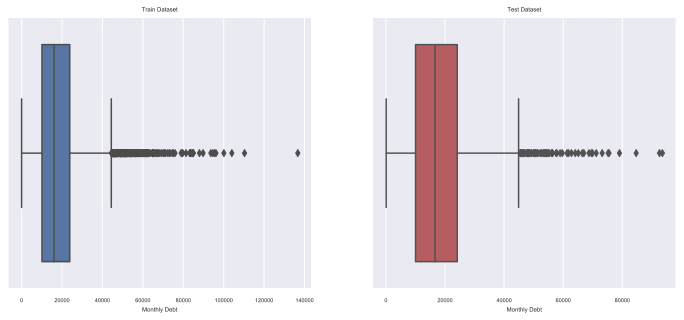

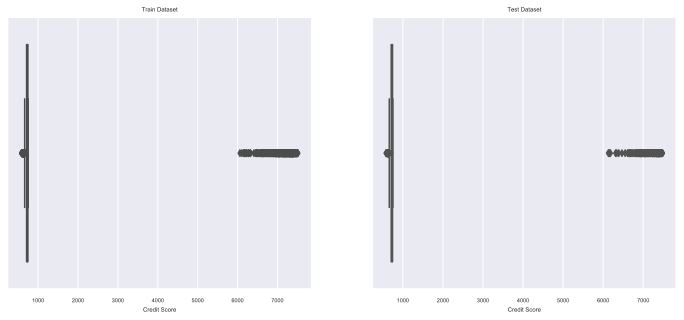

In [799]:
'''Визуальное изучение распределений - непрерывные данные'''
cont_cols = ['Annual Income', 'Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score']
cat_cols =['Home Ownership', 'Years in current job', 'Purpose', 'Term']
TARGET = ['Credit Default']

for col in cont_cols:
    plot_outliers(df_train, df_test, col)

In [800]:
'''Превратим категориальные признаки тренировочного датасета в строковый тип данных'''
for colname in ['Home Ownership', 'Years in current job', 'Purpose', 'Term']:
    df_train_prep[colname] = df_train_prep[colname].astype(str)

KeyError: 'Home Ownership'

In [ ]:
'''Превратим категориальные признаки тестового датасета в строковый тип данных'''
for colname in ['Home Ownership', 'Years in current job', 'Purpose', 'Term']:
    df_test[colname] = df_test[colname].astype(str)

In [ ]:
'''Согласованность категориальных данных'''
def plot_outliers_cat(df_train, df_test, col_name):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
   
    ax[0].set_title('Train Dataset')
    ax[1].set_title('Test Dataset')   

    sns.countplot(x=col_name, data=df_train, ax=ax[0]);
    sns.countplot(x=col_name, data=df_test, ax=ax[1]);
    plt.show()

In [ ]:
cat_cols =['Home Ownership', 'Years in current job', 'Purpose', 'Term']
TARGET = ['Credit Default']

for col in cat_cols:
    plot_outliers_cat(df_train, df_test, col)

### Этап 2. Обработка пропусков тренировочного датасета

In [ ]:
df_train_prep = df_train.copy()

In [ ]:
'''Пропущенные данные и уникальные данные'''
def show_nans(df):
    for col in df.columns:
        print(col,5*'.',': number of unique:',len(df[col].unique()),':   number of nan records: ',df[col].isna().sum())
        print(30*'-')

In [ ]:
'''Пропущенные данные и уникальные данные тренировочного датасета.'''
show_nans(df_train_prep)

In [ ]:
df_train_prep['Years in current job'].value_counts()

In [ ]:
''' Заменаа пропусков признака "Years in current job" на наиболее встречающееся значение'''
df_train_prep['Years in current job'].fillna('10+ years', inplace=True)

In [ ]:
'''Заполнение пропусков в 'Annual Income' медианными значениями в зависимости от цели кредита'''
def fill_annual_income_nan(df):
    columns = df['Purpose'].value_counts().index.to_list()
    median_common = df['Annual Income'].median()
    for col in columns:
        median_by_purpose = df.loc[df['Purpose']==col, 'Annual Income'].median()
        if np.isnan(median_by_purpose):
            df.loc[df['Annual Income'].isnull() & (df['Purpose']==col),'Annual Income'] = median_common
        else:
             df.loc[df['Annual Income'].isnull() & (df['Purpose']==col),'Annual Income'] = median_by_purpose

In [ ]:
'''Для заполнения пропусков применим медианные значения, в зависимости от целей кредита:'''
fill_annual_income_nan(df_train_prep)

In [ ]:
'''Заполнение пропусков в 'Months since last delinquent' медианными значениями в зависимости от цели кредита'''
def fill_Months_since_nan(df):
    columns = df['Purpose'].value_counts().index.to_list()
    median_common = df['Months since last delinquent'].median()
    for col in columns:
        median_by_purpose = df.loc[df['Purpose']==col, 'Months since last delinquent'].median()
        if np.isnan(median_by_purpose):
            df.loc[df['Months since last delinquent'].isnull() & (df['Purpose']==col),'Months since last delinquent'] = median_common
        else:
             df.loc[df['Months since last delinquent'].isnull() & (df['Purpose']==col),'Months since last delinquent'] = median_by_purpose

In [ ]:
'''Для заполнения пропусков применим медианные значения, в зависимости от целей кредита:'''
fill_Months_since_nan(df_train_prep)

In [ ]:
''' заменаа пропусков признака "Bankruptcies" на наиболее встречающееся значение'''
df_train_prep['Bankruptcies'].fillna(0, inplace=True)

In [ ]:
'''Заполнение пропусков в 'Credit Score' медианными значениями в зависимости от цели кредита'''
def fill_Credit_Score_nan(df):
    columns = df['Purpose'].value_counts().index.to_list()
    median_common = df['Credit Score'].median()
    for col in columns:
        median_by_purpose = df.loc[df['Purpose']==col, 'Credit Score'].median()
        if np.isnan(median_by_purpose):
            df.loc[df['Credit Score'].isnull() & (df['Purpose']==col),'Credit Score'] = median_common
        else:
             df.loc[df['Credit Score'].isnull() & (df['Purpose']==col),'Credit Score'] = median_by_purpose

In [ ]:
'''Для заполнения пропусков применим медианные значения, в зависимости от целей кредита:'''
fill_Credit_Score_nan(df_train_prep)

In [ ]:
'''Преобразуем тип данных признака Term в числовой'''
df_train_prep['Term'] = df_train_prep['Term'].map({'Short Term': 0, 'Long Term': 1})

In [ ]:
df_train_prep.info()

### Этап 2.1 Обработка пропусков тестового датасета

In [ ]:
df_test_prep = df_test.copy()

In [ ]:
'''Пропущенные данные и уникальные данные тестового датасета.'''
show_nans(df_test_prep)

In [ ]:
''' Заменаа пропусков признака "Years in current job" на наиболее встречающееся значение'''
df_test_prep['Years in current job'].fillna('10+ years', inplace=True)

In [ ]:
'''Для заполнения пропусков 'Annual Income' применим медианные значения, в зависимости от целей кредита:'''
fill_annual_income_nan(df_test_prep)

In [ ]:
'''Для заполнения пропусков 'Months since last delinquent' применим медианные значения, в зависимости от целей кредита:'''
fill_Months_since_nan(df_test_prep)

In [ ]:
''' заменаа пропусков признака "Bankruptcies" на наиболее встречающееся значение'''
df_test_prep['Bankruptcies'].fillna(0, inplace=True)

In [ ]:
'''Для заполнения пропусков 'Credit Score' применим медианные значения, в зависимости от целей кредита:'''
fill_Credit_Score_nan(df_test_prep)

In [ ]:
'''Преобразуем тип данных признака Term в числовой'''
df_test_prep['Term'] = df_test_prep['Term'].map({'Short Term': 0, 'Long Term': 1})

In [ ]:
df_test_prep.info()

### Этап 3. Обработка выбросов тренировочного датасета

In [ ]:
def plot_hist_n_kde(feature, feature_name, hist_bins=50, x_log=False, y_log=False):
    rcParams['font.size'] = 8
    plt.figure(figsize=(12,5))

    plt.subplot(121)
    feature.hist(bins=hist_bins)
    plt.xlabel(feature_name)
    plt.ylabel('Кол-во записей в дата-сете')
    if y_log:
        plt.yscale('log')
    if x_log:
        plt.xscale('log')

    plt.subplot(122)
    sns.kdeplot(feature,legend=False,shade=True)
    plt.xlabel(feature_name)
    plt.ylabel('Плотность')
    if y_log:
        plt.yscale('log')
    if x_log:
        plt.xscale('log')
        
    plt.suptitle(f'Распределение значений признака "{feature_name}"',va='bottom',size=10)
    plt.show()

In [ ]:
''' Annual Income '''
plot_hist_n_kde(df_train_prep['Annual Income'], 'Annual Income', y_log=True)

In [801]:
''' Tax Liens '''
df_train_prep['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

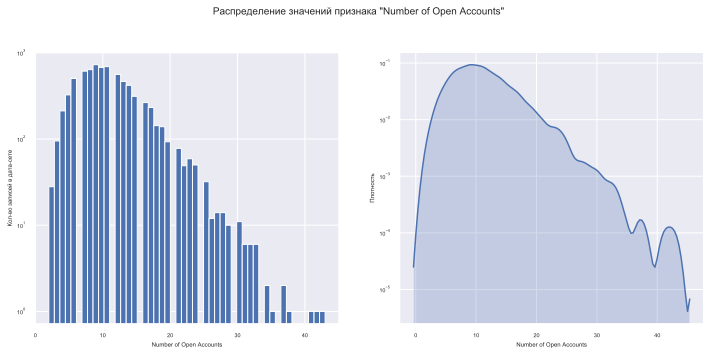

In [802]:
''' Number of Open Accounts '''
plot_hist_n_kde(df_train_prep['Number of Open Accounts'], 'Number of Open Accounts', y_log=True)

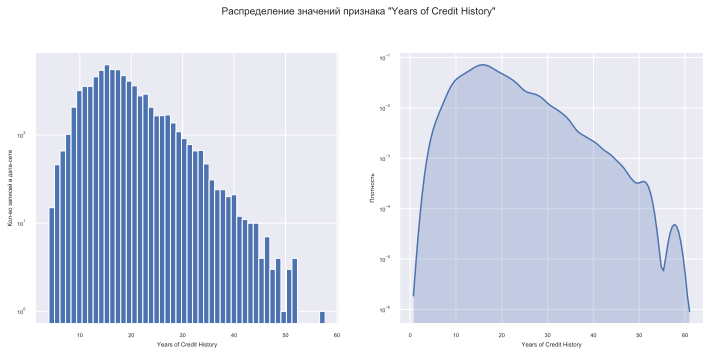

In [803]:
'''Years of Credit History'''
plot_hist_n_kde(df_train_prep['Years of Credit History'], 'Years of Credit History',  y_log=True)

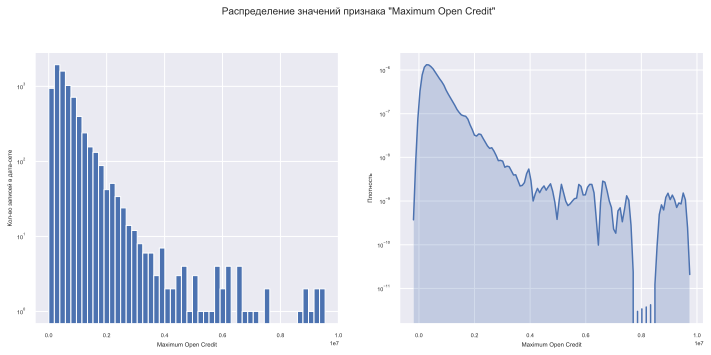

In [804]:
'''Maximum Open Credit'''
plot_hist_n_kde(df_train_prep['Maximum Open Credit'], 'Maximum Open Credit', y_log=True)

In [805]:
df_train_prep.loc[df_train_prep['Maximum Open Credit'] > (10**7), 'Maximum Open Credit'] = df_train_prep['Maximum Open Credit'].median()

In [806]:
df_train_prep.loc[df_train_prep['Maximum Open Credit'] == 0,'Maximum Open Credit'] = df_train_prep['Maximum Open Credit'].median()

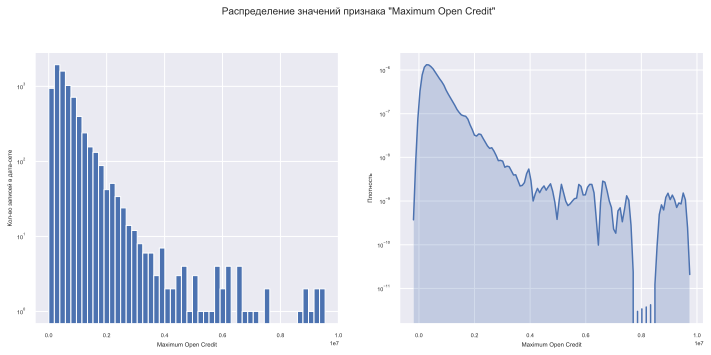

In [807]:
plot_hist_n_kde(df_train_prep['Maximum Open Credit'], 'Maximum Open Credit', y_log=True)

In [808]:
'''Number of Credit Problems'''
df_train_prep['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [809]:
'''Bankruptcies'''
df_train_prep['Bankruptcies'].value_counts()

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

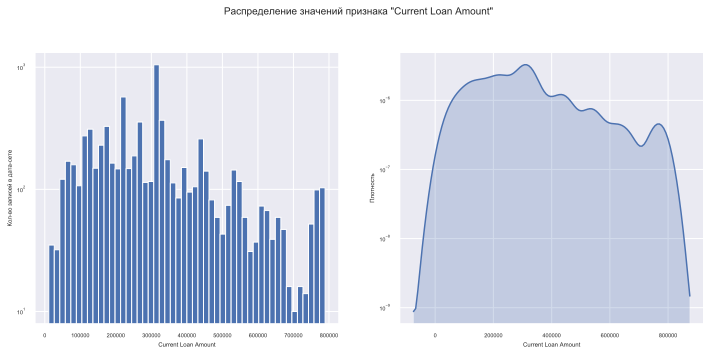

In [810]:
'''Current Loan Amount'''
plot_hist_n_kde(df_train_prep['Current Loan Amount'], 'Current Loan Amount', y_log=True)

In [811]:
df_train_prep['Current Loan Amount']

0       309573.0
1       264968.0
2       309573.0
3       121396.0
4       125840.0
          ...   
7495    129360.0
7496    444048.0
7497    309573.0
7498    615274.0
7499     26928.0
Name: Current Loan Amount, Length: 7500, dtype: float64

In [812]:
df_train_prep.loc[df_train_prep['Current Loan Amount'] == 99999999,'Current Loan Amount'] = df_train_prep['Current Loan Amount'].median()

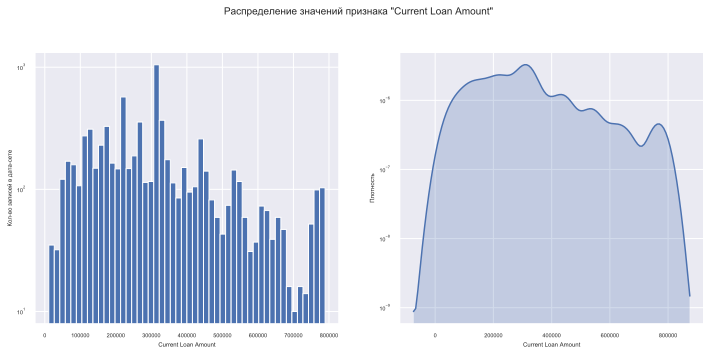

In [813]:
plot_hist_n_kde(df_train_prep['Current Loan Amount'], 'Current Loan Amount', y_log=True)

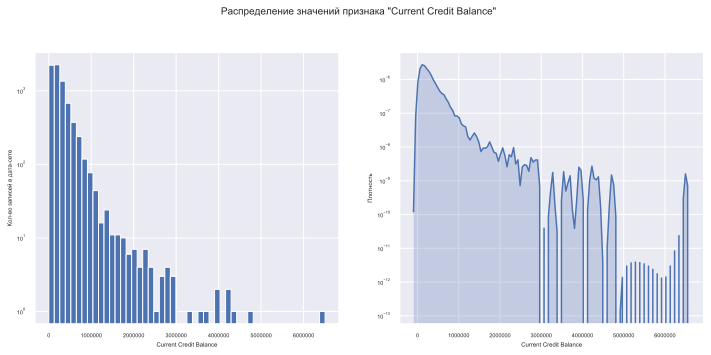

In [814]:
'''Current Credit Balance'''
plot_hist_n_kde(df_train_prep['Current Credit Balance'], 'Current Credit Balance', y_log=True)

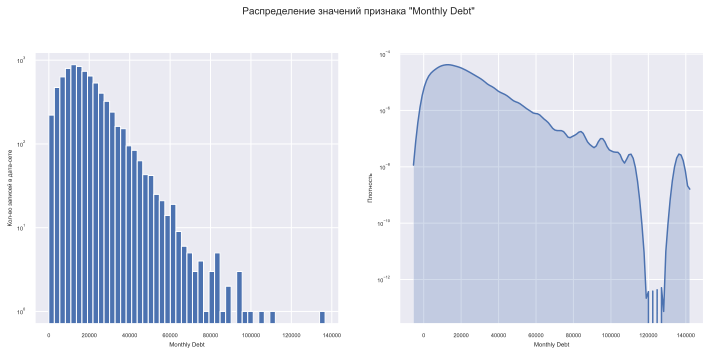

In [815]:
'''Monthly Debt'''
plot_hist_n_kde(df_train_prep['Monthly Debt'], 'Monthly Debt', y_log=True)

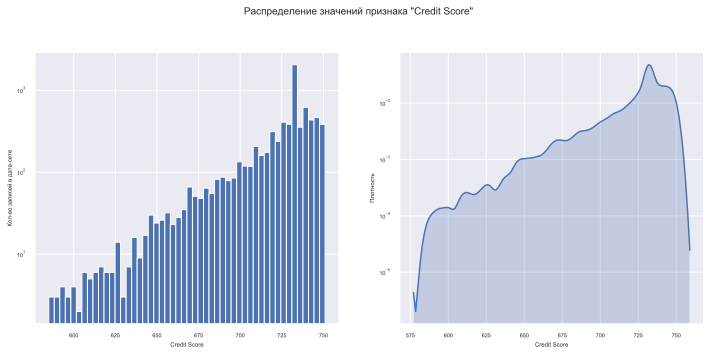

In [816]:
'''Credit Score'''
plot_hist_n_kde(df_train_prep['Credit Score'], 'Credit Score', y_log=True)

In [817]:
df_train_prep.loc[df_train_prep['Credit Score'] > 1000,'Credit Score'] = df_train_prep['Credit Score'].median()

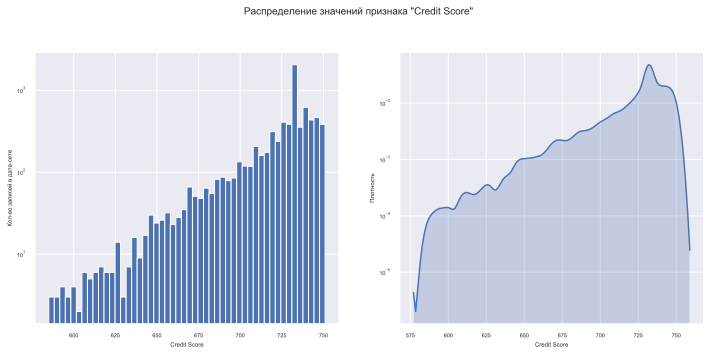

In [818]:
plot_hist_n_kde(df_train_prep['Credit Score'], 'Credit Score', y_log=True)

In [819]:
'''Credit Default'''
df_train_prep['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

### Этап 3.1 Обработка выбросов тестового датасета

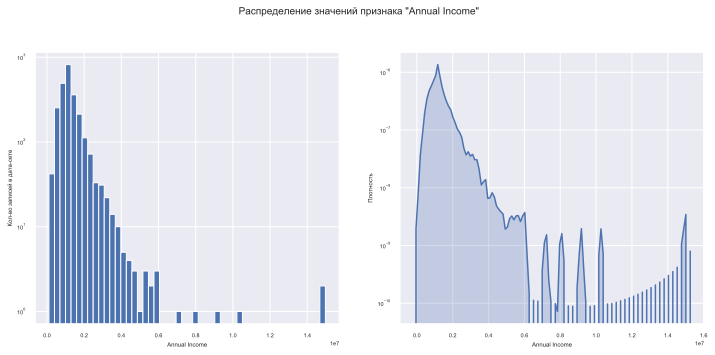

In [820]:
''' Annual Income '''
plot_hist_n_kde(df_test_prep['Annual Income'], 'Annual Income', y_log=True)

In [821]:
''' Tax Liens '''
df_test_prep['Tax Liens'].value_counts()

0.0     2445
1.0       45
2.0        5
15.0       1
3.0        1
6.0        1
4.0        1
5.0        1
Name: Tax Liens, dtype: int64

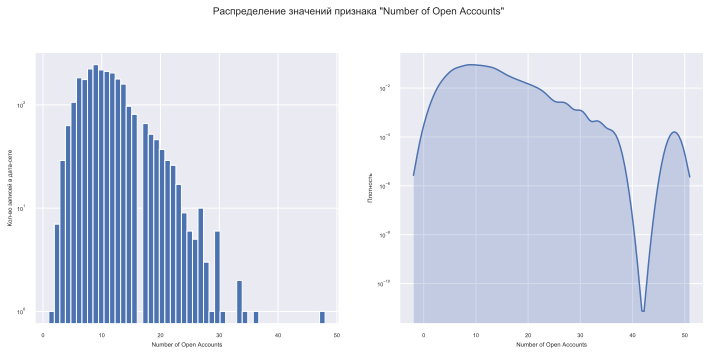

In [822]:
''' Number of Open Accounts '''
plot_hist_n_kde(df_test_prep['Number of Open Accounts'], 'Number of Open Accounts', y_log=True)

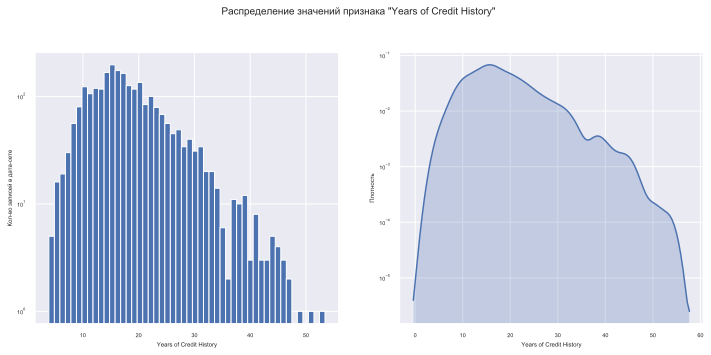

In [823]:
'''Years of Credit History'''
plot_hist_n_kde(df_test_prep['Years of Credit History'], 'Years of Credit History',  y_log=True)

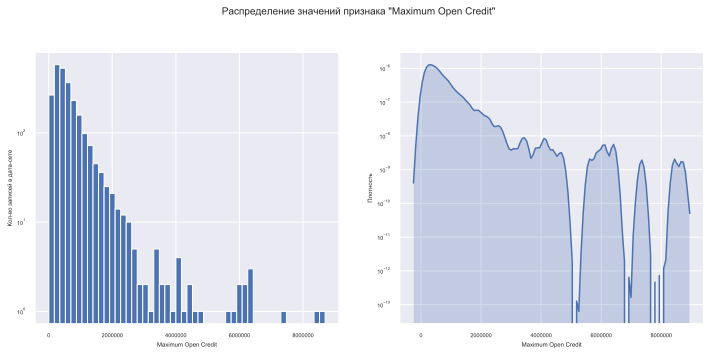

In [824]:
'''Maximum Open Credit'''
plot_hist_n_kde(df_test_prep['Maximum Open Credit'], 'Maximum Open Credit', y_log=True)

In [825]:
df_test_prep.loc[df_test_prep['Maximum Open Credit'] > (10**7), 'Maximum Open Credit'] = df_test_prep['Maximum Open Credit'].median()

In [826]:
df_test_prep.loc[df_test_prep['Maximum Open Credit'] == 0,'Maximum Open Credit'] = df_test_prep['Maximum Open Credit'].median()

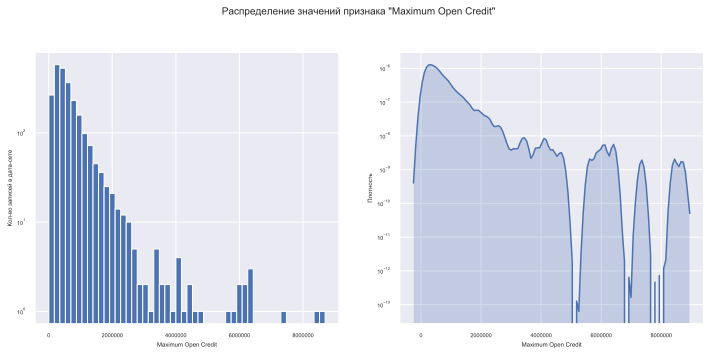

In [827]:
plot_hist_n_kde(df_test_prep['Maximum Open Credit'], 'Maximum Open Credit', y_log=True)

In [828]:
'''Number of Credit Problems'''
df_test_prep['Number of Credit Problems'].value_counts()

0.0     2177
1.0      280
2.0       29
3.0        7
5.0        4
15.0       1
4.0        1
7.0        1
Name: Number of Credit Problems, dtype: int64

In [829]:
'''Bankruptcies'''
df_test_prep['Bankruptcies'].value_counts()

0.0    2255
1.0     234
2.0       5
3.0       3
5.0       2
4.0       1
Name: Bankruptcies, dtype: int64

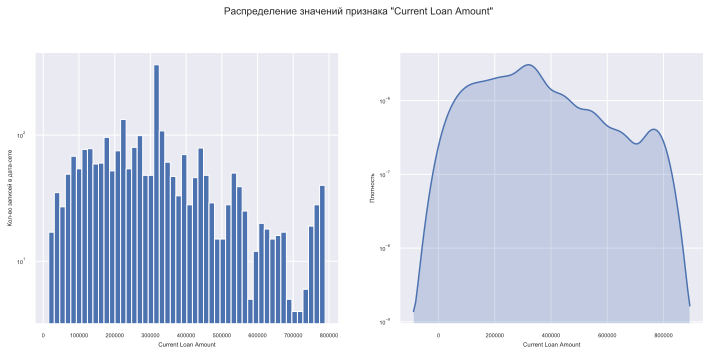

In [830]:
'''Current Loan Amount'''
plot_hist_n_kde(df_test_prep['Current Loan Amount'], 'Current Loan Amount', y_log=True)

In [831]:
df_test_prep['Current Loan Amount']

0       162470.0
1        78298.0
2       200178.0
3       217382.0
4       777634.0
          ...   
2495    322366.0
2496    468512.0
2497    430496.0
2498    257774.0
2499    763004.0
Name: Current Loan Amount, Length: 2500, dtype: float64

In [832]:
df_test_prep.loc[df_test_prep['Current Loan Amount'] == 99999999,'Current Loan Amount'] = df_test_prep['Current Loan Amount'].median()

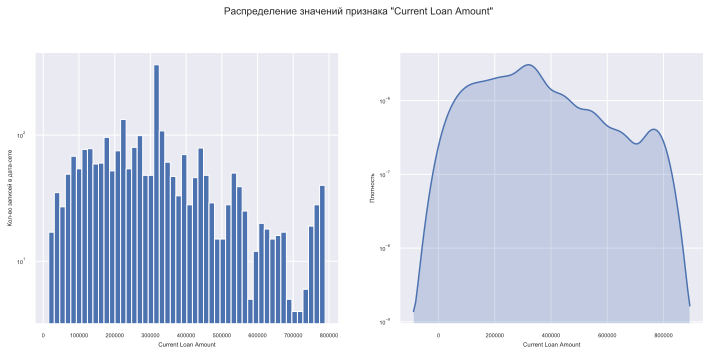

In [833]:
plot_hist_n_kde(df_test_prep['Current Loan Amount'], 'Current Loan Amount', y_log=True)

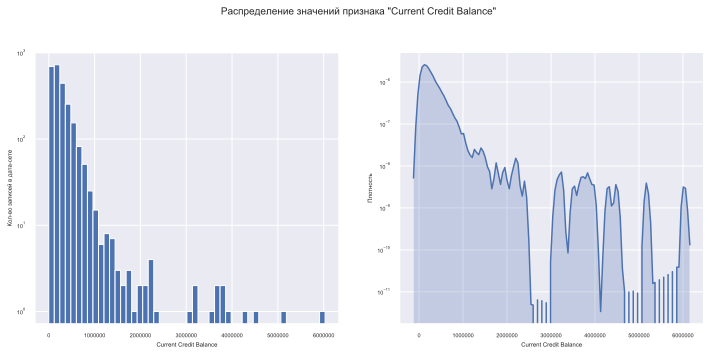

In [834]:
'''Current Credit Balance'''
plot_hist_n_kde(df_test_prep['Current Credit Balance'], 'Current Credit Balance', y_log=True)

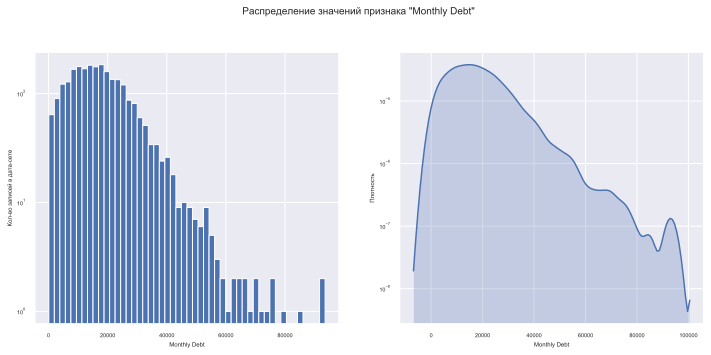

In [835]:
'''Monthly Debt'''
plot_hist_n_kde(df_test_prep['Monthly Debt'], 'Monthly Debt', y_log=True)

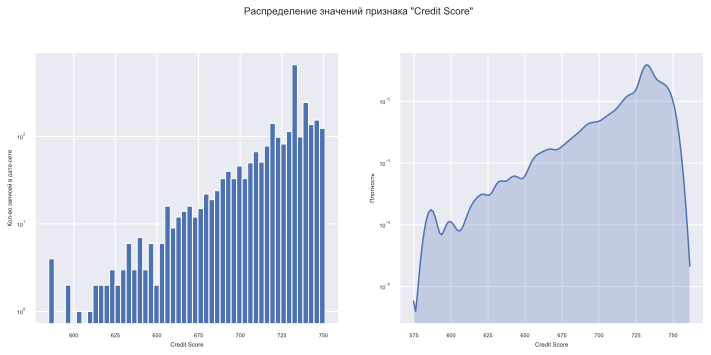

In [836]:
'''Credit Score'''
plot_hist_n_kde(df_test_prep['Credit Score'], 'Credit Score', y_log=True)

In [837]:
df_test_prep.loc[df_test_prep['Credit Score'] > 1000,'Credit Score'] = df_test_prep['Credit Score'].median()

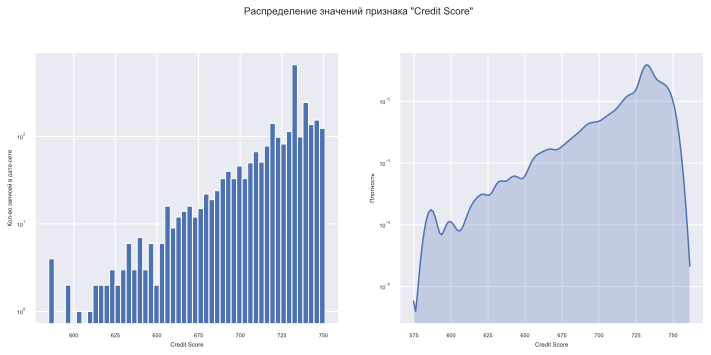

In [838]:
plot_hist_n_kde(df_test_prep['Credit Score'], 'Credit Score', y_log=True)

### 4. Преобразование категориальных признаков в бинарный тип данных тренировочного датасета

In [839]:
'''Обзор номинативных признаков'''
for cat_colname in df_train_prep.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train_prep[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

In [840]:
'''Изменение типа данных признаков Home Ownership, Years in current job, Purpose'''
df_train_prep =pd.get_dummies(df_train_prep)
df_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual Income                   7500 non-null   float64
 1   Tax Liens                       7500 non-null   float64
 2   Number of Open Accounts         7500 non-null   float64
 3   Years of Credit History         7500 non-null   float64
 4   Maximum Open Credit             7500 non-null   float64
 5   Number of Credit Problems       7500 non-null   float64
 6   Months since last delinquent    7500 non-null   float64
 7   Bankruptcies                    7500 non-null   float64
 8   Term                            7500 non-null   int64  
 9   Current Loan Amount             7500 non-null   float64
 10  Current Credit Balance          7500 non-null   float64
 11  Monthly Debt                    7500 non-null   float64
 12  Credit Score                    75

### 4.1 Преобразование категориальных признаков в бинарный тип данных тестового датасета

In [841]:
'''Обзор номинативных признаков'''
for cat_colname in df_test_prep.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_test_prep[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

In [842]:
'''Изменение типа данных признаков Home Ownership, Years in current job, Purpose'''
df_test_prep =pd.get_dummies(df_test_prep)
df_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Annual Income                   2500 non-null   float64
 1   Tax Liens                       2500 non-null   float64
 2   Number of Open Accounts         2500 non-null   float64
 3   Years of Credit History         2500 non-null   float64
 4   Maximum Open Credit             2500 non-null   float64
 5   Number of Credit Problems       2500 non-null   float64
 6   Months since last delinquent    2500 non-null   float64
 7   Bankruptcies                    2500 non-null   float64
 8   Term                            2500 non-null   int64  
 9   Current Loan Amount             2500 non-null   float64
 10  Current Credit Balance          2500 non-null   float64
 11  Monthly Debt                    2500 non-null   float64
 12  Credit Score                    25

### 5. Анализ данных

In [843]:
'''Выделение целевой переменной и группы признаков'''
TARGET_NAME = 'Credit Default'
FEATURE_NAMES_PREP = df_train_prep.columns.drop(TARGET_NAME).tolist()

In [844]:
df_train_prep.head()

Annual Income  Tax Liens  Number of Open Accounts  Years of Credit History  \
0       482087.0        0.0                     11.0                     26.3   
1      1025487.0        0.0                     15.0                     15.3   
2       751412.0        0.0                     11.0                     35.0   
3       805068.0        0.0                      8.0                     22.5   
4       776264.0        0.0                     13.0                     13.6   

   Maximum Open Credit  Number of Credit Problems  \
0             685960.0                        1.0   
1            1181730.0                        0.0   
2            1182434.0                        0.0   
3             147400.0                        1.0   
4             385836.0                        1.0   

   Months since last delinquent  Bankruptcies  Term  Current Loan Amount  \
0                          33.0           1.0     0             309573.0   
1                          33.0           0.0     1             264968.0   
2                          33.0           0.0     0             309573.0   
3                          33.0           1.0     0             121396.0   
4                          33.0           0.0     0             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  \
0                 47386.0        7914.0         749.0               0   
1                394972.0       18373.0         737.0               1   
2                308389.0       13651.0         742.0               0   
3                 95855.0       11338.0         694.0               0   
4                 93309.0        7180.0         719.0               0   

   Home Ownership_Have Mortgage  Home Ownership_Home Mortgage  \
0                             0                             0   
1                             0                             0   
2                             0                             1   
3                             0                             0   
4                             0                             0   

   Home Ownership_Own Home  Home Ownership_Rent  Years in current job_1 year  \
0                        1                    0                            0   
1                        1                    0                            0   
2                        0                    0                            0   
3                        1                    0                            0   
4                        0                    1                            0   

   Years in current job_10+ years  Years in current job_2 years  \
0                               1                             0   
1                               1                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   

   Years in current job_3 years  Years in current job_4 years  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   Years in current job_5 years  Years in current job_6 years  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             1   
4                             0                             0   

   Years in current job_7 years  Years in current job_8 years  \
0                             0                             0   
1                             0                             0   
2                             0                  

In [845]:
'''Обзор распределения целевого признака'''
df_train_prep['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

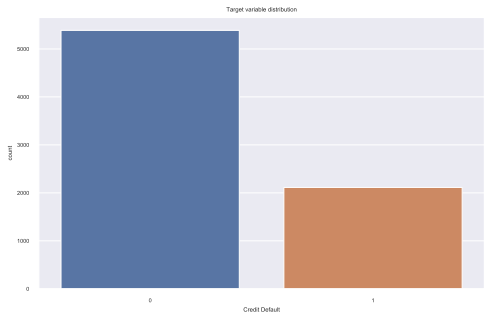

In [846]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Credit Default', data=df_train_prep)
plt.title('Target variable distribution')
plt.show()

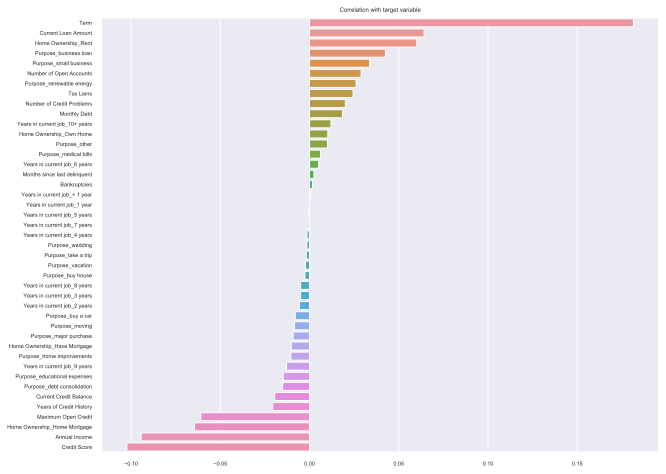

In [847]:
'''Корреляция целевой переменной с признаками'''
corr_with_target = df_train_prep[FEATURE_NAMES_PREP + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable')
plt.show()

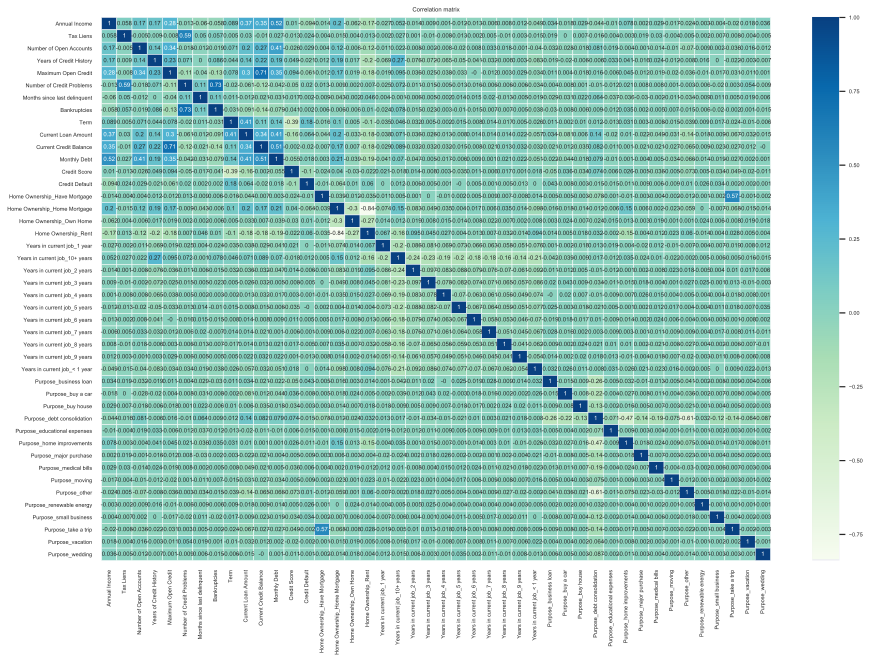

In [848]:
'''Матрица корреляций тренировочного датасета'''
plt.figure(figsize = (15,10))

sns.set(font_scale=0.5)
sns.heatmap(df_train_prep.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

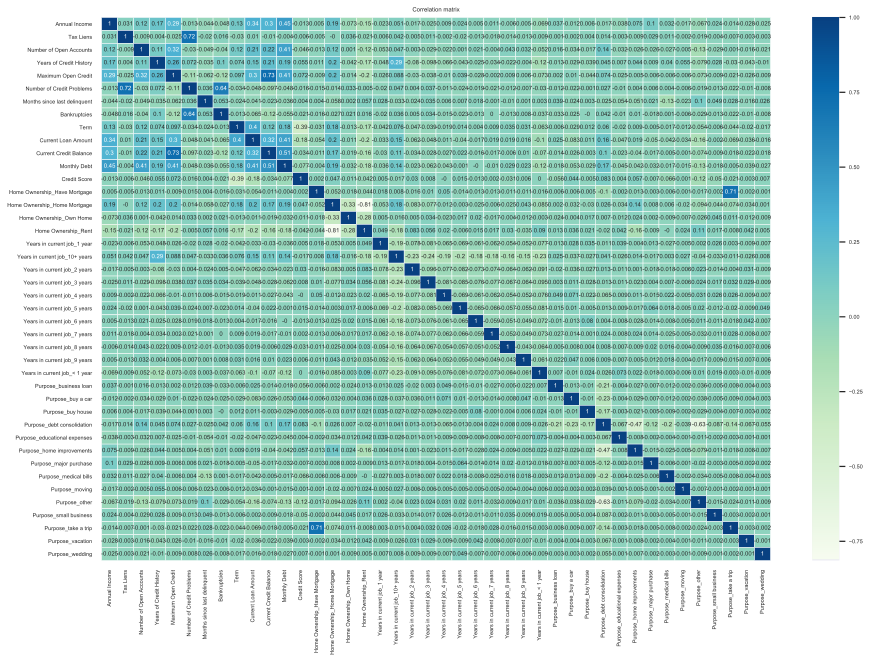

In [849]:
'''Матрица корреляций тестового датасета'''
plt.figure(figsize = (15,10))

sns.set(font_scale=0.5)
sns.heatmap(df_test_prep.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### 6. Построение модели классификации

In [850]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [851]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1)

In [852]:
'''Нормализация данных тренировочного датасета'''
scaler = StandardScaler()

df_train_prep_norm = df_train_prep.copy()
df_train_prep_norm[FEATURE_NAMES_PREP] = scaler.fit_transform(df_train_prep_norm[FEATURE_NAMES_PREP])

df = df_train_prep_norm.copy()

In [853]:
'''Сохранение модели для нормализации данных'''
SCALER_FILE_PATH = 'scaler.pkl'
with open('SCALER_FILE_PATH', 'wb') as file:
    pickle.dump(scaler, file)

In [854]:
'''Разбиение тренировочного датасета на train и test'''
X = df[FEATURE_NAMES_PREP]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)
X_train.shape

(5250, 43)

In [855]:
X_test.shape

(2250, 43)

In [856]:
'''Балансировка целевой переменной'''
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3771
1    2958
Name: Credit Default, dtype: int64

In [857]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

### 7. Построение и оценка базовых моделей

In [858]:
'''Логистическая регрессия'''
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.64      0.79      0.71      3771
           1       0.62      0.44      0.52      2958

    accuracy                           0.64      6729
   macro avg       0.63      0.62      0.61      6729
weighted avg       0.64      0.64      0.62      6729

TEST

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1616
           1       0.42      0.41      0.41       634

    accuracy                           0.67      2250
   macro avg       0.59      0.59      0.59      2250
weighted avg       0.67      0.67      0.67      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1256  360
1                375  259


In [859]:
'''k ближайших соседей'''
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.76      0.82      0.78      3771
           1       0.74      0.66      0.70      2958

    accuracy                           0.75      6729
   macro avg       0.75      0.74      0.74      6729
weighted avg       0.75      0.75      0.75      6729

TEST

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1616
           1       0.33      0.38      0.36       634

    accuracy                           0.61      2250
   macro avg       0.54      0.54      0.54      2250
weighted avg       0.63      0.61      0.62      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1131  485
1                392  242


In [860]:
'''Бустинговый алгоритм LightGBM'''
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3771
           1       0.92      0.89      0.91      2958

    accuracy                           0.92      6729
   macro avg       0.92      0.92      0.92      6729
weighted avg       0.92      0.92      0.92      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1616
           1       0.53      0.48      0.50       634

    accuracy                           0.73      2250
   macro avg       0.67      0.66      0.66      2250
weighted avg       0.73      0.73      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1341  275
1                327  307


In [861]:
'''Бустинговый алгоритм CatBoost'''
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3771
           1       0.92      0.87      0.90      2958

    accuracy                           0.91      6729
   macro avg       0.91      0.91      0.91      6729
weighted avg       0.91      0.91      0.91      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1616
           1       0.52      0.49      0.51       634

    accuracy                           0.73      2250
   macro avg       0.66      0.66      0.66      2250
weighted avg       0.72      0.73      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1327  289
1                322  312


In [862]:
'''Выбор лучшей модели и подбор гиперпараметров'''
model_catb = catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21)
params = {'n_estimators':[50, 100, 200, 500, 700, 1000, 1200, 1500],
          'max_depth':[3, 5, 7]}
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [863]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

Wall time: 58.8 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000243DE7F0688>,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 500, 700,
                                                         1000, 1200, 1500]},
                   scoring='f1')

In [864]:
rs.best_params_

{'n_estimators': 700, 'max_depth': 5}

In [865]:
rs.best_score_

0.5413360439283245

In [866]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=700, max_depth=5,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3771
           1       0.86      0.79      0.82      2958

    accuracy                           0.85      6729
   macro avg       0.85      0.84      0.85      6729
weighted avg       0.85      0.85      0.85      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1616
           1       0.52      0.51      0.51       634

    accuracy                           0.73      2250
   macro avg       0.66      0.66      0.66      2250
weighted avg       0.73      0.73      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1312  304
1                309  325
Wall time: 2.4 s


### 8. Улучшение полученной модели

In [867]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.4, 0.6, 15):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [868]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(12,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [869]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (12, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

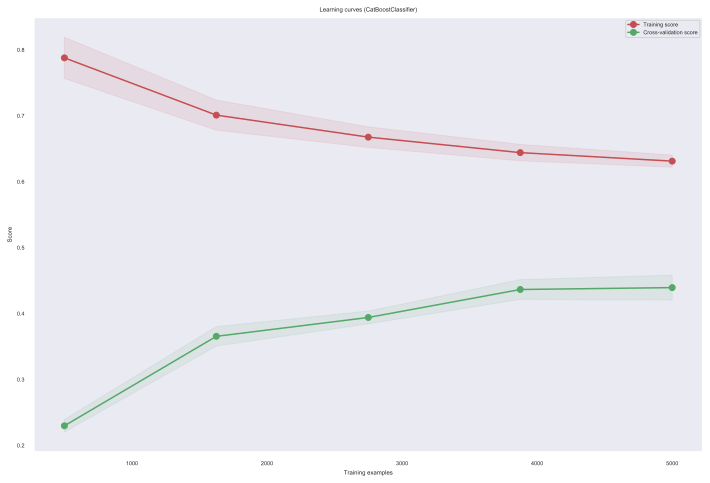

In [870]:
'''Модель до регуляризации'''
show_learning_curve_plot(final_model, X, y)

In [871]:
'''Снижение степени переобучения'''
final_model = catb.CatBoostClassifier(n_estimators=700, max_depth=5,
                                      l2_leaf_reg=1,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3771
           1       0.87      0.80      0.83      2958

    accuracy                           0.86      6729
   macro avg       0.86      0.85      0.86      6729
weighted avg       0.86      0.86      0.86      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1616
           1       0.53      0.50      0.52       634

    accuracy                           0.73      2250
   macro avg       0.67      0.66      0.67      2250
weighted avg       0.73      0.73      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1330  286
1                314  320


In [872]:
'''Подбор оптимального размера выборки, кривая обучения'''
final_model = catb.CatBoostClassifier(n_estimators=700, max_depth=5,
                                      class_weights=[1, 3.5],
                                      silent=True, random_state=21)

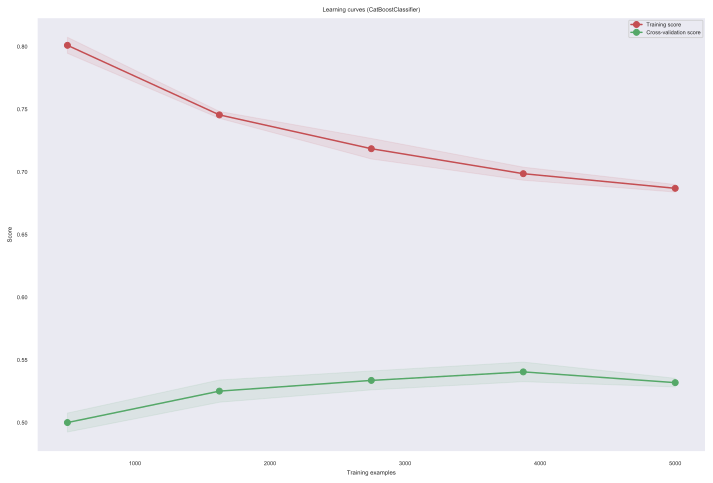

In [873]:
'''Модель посе регуляризации'''
show_learning_curve_plot(final_model, X, y)

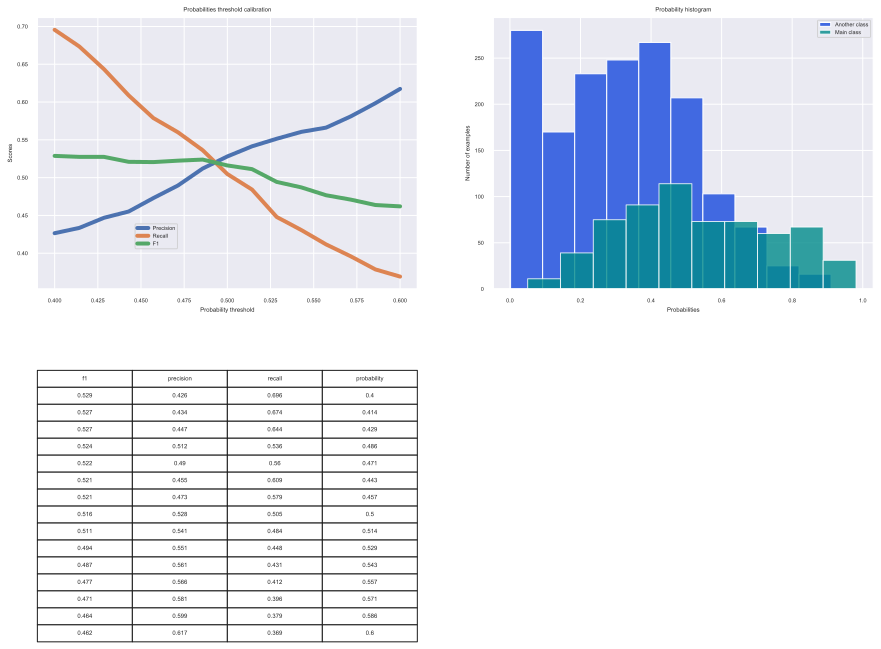

In [874]:
'''Выбор порога вероятности для определения класса'''
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

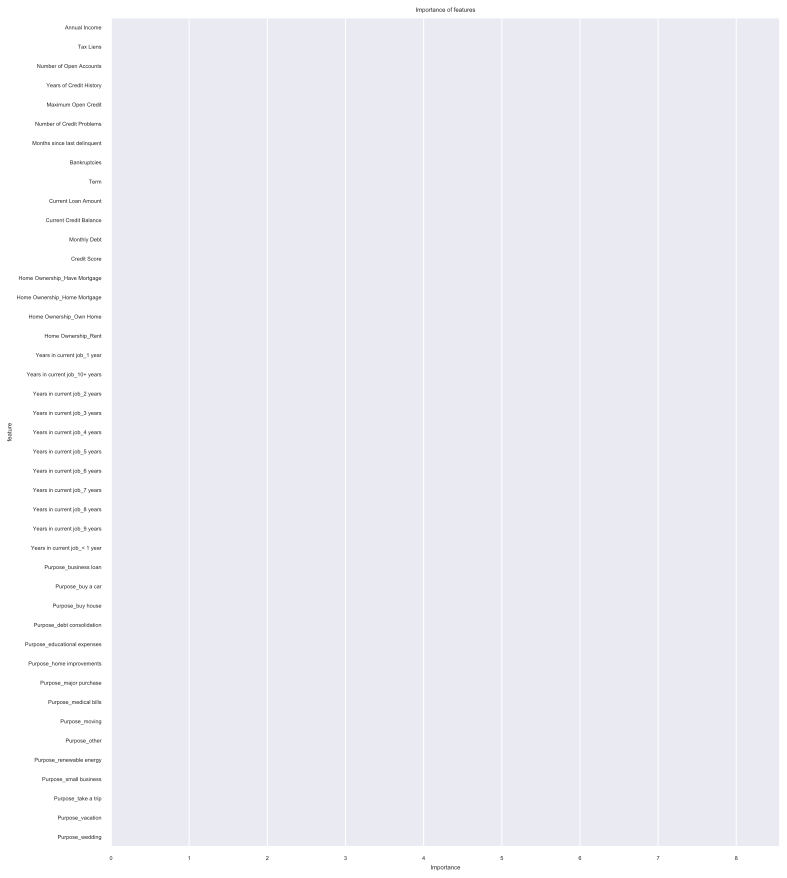

In [875]:
'''Важность признаков'''
important_features_top = show_feature_importances(X_train.columns, final_model.feature_importances_, get_top=15)

In [876]:
important_features_top

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Home Ownership_Have Mortgage',
 'Home Ownership_Home Mortgage']

### 9. Создание финальной модели

In [877]:
final_model = catb.CatBoostClassifier(n_estimators=700, max_depth=5, l2_leaf_reg=1,
                                      silent=True, random_state=21)
final_model.fit(X_train[important_features_top], y_train)

y_train_pred = final_model.predict(X_train[important_features_top])
y_test_pred = final_model.predict(X_test[important_features_top])
y_test_pred_probs = final_model.predict_proba(X_test[important_features_top])

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3771
           1       0.86      0.77      0.82      2958

    accuracy                           0.85      6729
   macro avg       0.85      0.84      0.84      6729
weighted avg       0.85      0.85      0.84      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1616
           1       0.51      0.51      0.51       634

    accuracy                           0.72      2250
   macro avg       0.66      0.66      0.66      2250
weighted avg       0.72      0.72      0.72      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1304  312
1                313  321


In [878]:
def get_classification_report1(y_true, y_pred):
    print('TRAIN\n\n' + classification_report(y_true, y_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_true, y_pred))

In [879]:
'''Обучение модели на полных тренировочных данных'''
final_model = catb.CatBoostClassifier(n_estimators=700, max_depth=5, l2_leaf_reg=1,
                                      silent=True, random_state=21)
final_model.fit(X[important_features_top], y)

y_full_pred = final_model.predict(X[important_features_top])
y_full_pred_probs = final_model.predict_proba(X[important_features_top])

get_classification_report1(y, y_full_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5387
           1       0.87      0.45      0.60      2113

    accuracy                           0.83      7500
   macro avg       0.85      0.71      0.74      7500
weighted avg       0.83      0.83      0.81      7500

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               5246  141
1               1154  959


In [880]:
'''Сохранение финальной модели'''
MODEL_FILE_PATH = 'final_model.pkl'

In [881]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

In [882]:
'''Использеум данные тестового датасета'''
XTest = df_test_prep
XTest

Annual Income  Tax Liens  Number of Open Accounts  \
0         1181857.0        0.0                      9.0   
1          231838.0        0.0                      6.0   
2         1152540.0        0.0                     10.0   
3         1220313.0        0.0                     16.0   
4         2340952.0        0.0                     11.0   
...             ...        ...                      ...   
2495      1020053.0        0.0                     14.0   
2496      1181857.0        0.0                     15.0   
2497      1171806.0        0.0                     48.0   
2498       723520.0        0.0                     14.0   
2499      1694439.0        0.0                     12.0   

      Years of Credit History  Maximum Open Credit  Number of Credit Problems  \
0                        12.5             220968.0                        0.0   
1                        32.7              55946.0                        0.0   
2                        13.7             204600.0                        0.0   
3                        17.0             456302.0                        0.0   
4                        23.6            1207272.0                        0.0   
...                       ...                  ...                        ...   
2495                     29.1             559152.0                        1.0   
2496                     17.0            1737780.0                        0.0   
2497                     12.8            1706430.0                        0.0   
2498                     28.8             945780.0                        0.0   
2499                     18.4            1199748.0                        1.0   

      Months since last delinquent  Bankruptcies  Term  Current Loan Amount  \
0                             70.0           0.0     0             162470.0   
1                              8.0           0.0     0              78298.0   
2                             29.5           0.0     0             200178.0   
3                             70.0           0.0     0             217382.0   
4                             29.5           0.0     1             777634.0   
...                            ...           ...   ...                  ...   
2495                          68.0           1.0     0             322366.0   
2496                          77.0           0.0     0             468512.0   
2497                          29.5           0.0     0             430496.0   
2498                          29.5           0.0     0             257774.0   
2499                          72.0           0.0     1             763004.0   

      Current Credit Balance  Monthly Debt  Credit Score  \
0                   105906.0        6813.0         732.0   
1                    46037.0        2318.0         699.0   
2                   146490.0       18729.0         732.0   
3                   213199.0       27559.0         739.0   
4                   425391.0       42605.0         706.0   
...                      ...           ...           ...   
2495                162735.0       15046.0         745.0   
2496               1439269.0       32996.0         732.0   
2497                676438.0       36912.0         695.0   
2498                391248.0       13506.0         744.0   
2499                559531.0       23440.0         732.0   

      Home Ownership_Have Mortgage  Home Ownership_Home Mortgage  \
0                                0                             0   
1                                0                             0   
2                                0                             1   
3                                0                             1   
4                                0                             1   
...                            ...                           ...   
2495                             0                             1   
2496                             0                             1   
2497                             0        

In [883]:
# прочитаем нашу ранее сохраненную модель  
with open(MODEL_FILE_PATH, 'rb') as file:
    model=pickle.load(file)

In [884]:
'''Сделаем прогноз'''
YPred = model.predict(XTest)
YPred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [885]:
pd_YPred = pd.DataFrame({'Id': XTest.index, 'Credit Default':YPred})
pd_YPred

Id  Credit Default
0        0               0
1        1               0
2        2               0
3        3               0
4        4               0
...    ...             ...
2495  2495               0
2496  2496               0
2497  2497               0
2498  2498               0
2499  2499               0

[2500 rows x 2 columns]

In [886]:
# сохраняем датасет с предсказанными данными
pd_YPred.to_csv('AKolyvanov_predictions.csv', index=False, encoding='utf-8')